In [1]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 4GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

ValueError: Cannot set memory growth on device when virtual devices configured

In [5]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
import tensorflow as tf

from tensorflow.keras import datasets, models, optimizers
from tensorflow.keras.layers import TimeDistributed, Conv2D, Flatten, Dense, LSTM, ConvLSTM2D, MaxPool2D, Dropout, Conv1D, Activation
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd

In [7]:
tf.__version__

'1.15.2'

In [8]:
 tf.test.is_gpu_available()

True

In [9]:
tf.test.is_built_with_cuda()

True

In [7]:
# tf.compat.v1.enable_eager_execution()

In [8]:
inputs_train = np.load("inputs_train_180.npy")
inputs_test = np.load("inputs_test_180.npy")

In [10]:
import numpy as np
def normalize(data, window, step):
    frame = '_1min'
    values = [c for c in data.columns if frame in c]
    ohlc = data.iloc[step - window + 1:step + 1][values].copy()

    min_low = ohlc[values].min().min()
    for c in ohlc.columns:
        ohlc[c] -= min_low

    max_high = ohlc[values].max().max()
    for c in ohlc.columns:
        ohlc[c] /= max_high

    return ohlc.values

In [11]:
train = pd.read_csv('train_timeframes3.csv')
test = pd.read_csv('test_timeframes3.csv')

In [12]:
window_size = 12*60

In [9]:
normalize(train, window_size , 1000)

['close_bid_1min', 'open_1min', 'high_1min', 'low_1min', 'close_1min']


array([[0.58583433, 0.59543818, 0.59603842, 0.59483794, 0.59603842],
       [0.59063625, 0.59543818, 0.60744298, 0.59543818, 0.60084034],
       [0.59963986, 0.59903962, 0.6092437 , 0.59543818, 0.6092437 ],
       ...,
       [0.08523409, 0.08163265, 0.09303721, 0.08103241, 0.09303721],
       [0.07623049, 0.09243697, 0.1032413 , 0.08163265, 0.08463385],
       [0.06242497, 0.08403361, 0.08523409, 0.06902761, 0.07022809]])

In [139]:
%%time
inputs_train = []
for i in range(window_size-1, len(train)):
    if i % 1000 == 0:
        print(i)
    inputs_train.append(normalize(train, window_size , i))
inputs_train = np.array(inputs_train)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

MemoryError: Unable to allocate 25.2 GiB for an array with shape (939421, 720, 5) and data type float64

In [140]:
%%time
inputs_test = []
for i in range(window_size-1, len(test)):
    if i % 1000 == 0:
        print(i)
    inputs_test.append(normalize(test, window_size , i))
inputs_test = np.array(inputs_test)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
Wall time: 9min 44s


In [13]:
train = pd.read_csv('train_timeframes3.csv').iloc[window_size-1:]
test = pd.read_csv('test_timeframes3.csv').iloc[window_size-1:]

In [14]:
df = [train, test]

In [147]:
inputs_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [146]:
img = inputs_train[0,:,:]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
img.shape

In [ ]:
inputs_train.shape, train.shape

In [ ]:
inputs_test.shape, test.shape

In [162]:
!mkdir inputs_train
for i in range(len(inputs_train)):
    np.save(f"inputs_train/{i}.npy", inputs_train[i])

In [163]:
!mkdir inputs_test
for i in range(len(inputs_test)):
    np.save(f"inputs_test/{i}.npy", inputs_test[i])

In [148]:
np.save(f"inputs_train_{window_size}.npy", inputs_train)
np.save(f"inputs_test_{window_size}.npy", inputs_test)

MemoryError: Unable to allocate 25.2 GiB for an array with shape (939421, 720, 5) and data type float64

In [15]:
idx = 0
batch_size = 32
margin_size = 50
time_limit = 60

In [11]:
def get_model():
    model = models.Sequential()
    # model.add(LSTM(64, input_shape = img.shape, return_sequences=True, dropout=0.2))
    model.add(LSTM(32, dropout=0.5))
    # model.add(LSTM(32, dropout=0.2))
    model.add(Dense(1, activation="linear"))
    return model

model = get_model()

In [26]:
def get_model():
    model = models.Sequential()
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='linear'))
    return model
model = get_model()

In [18]:
# model = tf.keras.models.load_model('profit_model/', compile=False)

In [19]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [17]:
buffer_train = time_limit
buffer_test = time_limit

In [18]:
buffer_train, buffer_test

(60, 60)

In [23]:
def custom_loss_wrapper(idx, stop_limit, price_limit, margin_size):  
    def custom_loss(y_true, y_pred):
        #margin = ((y_pred[:,:1] - 0.5) * 2)
        #margin *= margin_size
        margin = y_pred[:,:1] #* direction * -1 * stop_limit
        direction = tf.sign(margin)
        stop_loss = ((y_pred[:,1:2] + 1) / 2) * direction * -1 * stop_limit
        price_target = ((y_pred[:,2:3] + 1) / 2) * direction * 1 * price_limit
        
        idxs = y_true[:,1]
        close1 = tf.gather(all_closes_train, tf.cast(idxs, dtype='int32'))
        close2 = tf.gather(all_closes_train, tf.cast(tf.add(idxs, time_limit, dtype='int32'))

        diff = close2 - close1
        profit = -100 * (margin * margin_size * (diff - (spread*direction))) /  close1
        return profit
#         return tf.where(tf.less(tf.abs(profit), 1), tf.sign(profit)*tf.sqrt(tf.abs(profit)), profit)
    return custom_loss

In [22]:
def get_profit(data, y_preds, margin_lower_limit=0):
    idx = 0
    profits = []
    while idx < len(y_preds) - 1:
        margin = y_preds[idx][0]
#         margin *= margin_size
        if abs(margin) < margin_lower_limit:
            idx += 1
        else:
            direction = np.sign(margin)
            stop_loss = ((y_preds[idx,1] + 1) / 2) * direction * -1 * stop_limit
            price_target = ((y_preds[idx,2] + 1) / 2) * direction * 1 * price_limit

            start_idx = idx
            close1 =  data.iloc[idx]['close_1min']
            spread = data.iloc[idx]['spread']
            idx += 1
            new_i = idx
            while new_i < len(data) - 1 and new_i - start_idx < time_limit:
                close2 = data.iloc[new_i]['close_1min']
                diff = (close2 - close1) 
                if min(stop_loss, price_limit) > diff * direction > max(stop_loss, price_limit):
                    print('here', min(stop_loss, price_limit), diff * direction, max(stop_loss, price_limit))
                    break
                new_i += 1
            profit = 100 * (margin * (diff - (spread*direction))) /  close1
            print(round(profit, 5), round(margin, 5), round(diff, 5), round(spread, 5), round(diff - spread*direction, 5), direction, round(close1, 5), round(close2, 5), round(stop_loss, 5), round(price_target, 5), new_i-idx)
#             print(profit)
            profits.append(profit)
#             break
    return profits

# data = df[]

In [37]:
get_profit(df[0], y_preds['train'], 0)

-3e-05 0.01619 0.00012 0.00014 -2e-05 1.0 1.13622 1.13634 -0.00523 0.02529 9999
0.00035 0.0138 0.00042 0.00013 0.00029 1.0 1.13597 1.13639 -0.00521 0.02525 9999
-0.00011 0.00912 0.0 0.00014 -0.00014 1.0 1.13628 1.13628 -0.0052 0.02523 9999
-9e-05 0.00359 -0.00015 0.00014 -0.00029 1.0 1.13641 1.13626 -0.00519 0.02519 9999
3e-05 -0.0012 -0.00037 0.00013 -0.00024 -1.0 1.1366 1.13623 0.0052 -0.02521 9999
0.00018 -0.00426 -0.00061 0.00012 -0.00049 -1.0 1.13649 1.13588 0.00521 -0.02524 9999
0.00037 -0.00503 -0.00095 0.00012 -0.00083 -1.0 1.13667 1.13572 0.00522 -0.02527 9999
0.00064 -0.00571 -0.00141 0.00014 -0.00127 -1.0 1.13678 1.13537 0.00524 -0.02531 9999
0.00045 -0.00478 -0.00119 0.00012 -0.00107 -1.0 1.13678 1.13559 0.00526 -0.02534 9999
0.00021 -0.00232 -0.00118 0.00013 -0.00105 -1.0 1.1367 1.13552 0.00527 -0.02535 9999
-8e-05 0.00085 -0.00098 0.00014 -0.00112 1.0 1.13651 1.13553 -0.00527 0.02536 9999
-0.00047 0.00357 -0.00138 0.00013 -0.00151 1.0 1.13686 1.13548 -0.00528 0.0254 9999


KeyboardInterrupt: 

In [25]:
# from keras.callbacks import Callback

# class IntervalEvaluation(Callback):
#     def __init__(self, validation_data=(), interval=10):
#         super(Callback, self).__init__()

#         self.interval = interval
#         self.X_val, self.y_val = validation_data

#     def on_epoch_end(self, epoch, logs={}):
#         if epoch % self.interval == 0:
#             y_pred = self.model.predict(self.X_val, verbose=0)
# #             score = np.mean(custom_metric_wrapper(idx, stop_limit, price_limit, margin_size, time_limit)(tf.convert_to_tensor(self.y_val), tf.convert_to_tensor(y_pred)))
# #             profits = get_profit(df[1], y_pred)
# #             profits_0 = get_profit(df[1], y_pred, 0)
#             print(np.min(y_pred, axis=0))
#             print(np.mean(y_pred, axis=0))
#             print(np.max(y_pred, axis=0))
# #             print("interval evaluation - epoch: {:d} - score: {:.6f} -- score_0: {:.6f}".format(epoch, profits, profits_0))
           
# buffer = (batch_size+time_limit) + 1000
# ival = IntervalEvaluation(validation_data=(inputs_test[:-buffer], np.array([[1, i] for i in range(len(test)-buffer)])), interval=10)

In [15]:
y_true = [(df[0].iloc[i+time_limit]['close_1min'] - df[0].iloc[i]['close_1min'])/df[0].iloc[i]['close_1min'] for i in range(len(df[0])-buffer_train)]

KeyboardInterrupt: 

In [20]:
y_true = (df[0]['close_1min'].values[time_limit:] - df[0]['close_1min'].values[:-time_limit])/df[0]['close_1min'].values[:-time_limit]

In [27]:
model = get_model()

In [28]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0005, epsilon=1.0),
    loss='msle',
#     loss=custom_loss_wrapper(idx, stop_limit, price_limit, margin_size),
#     metrics=[custom_metric_wrapper(idx, stop_limit, price_limit, margin_size, time_limit)],
    run_eagerly=False
)

In [29]:
import numpy as np
from tensorflow.python.keras.utils.data_utils import Sequence

class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, n_classes=1, shuffle=True):
        'Initialization'
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, window_size, 5))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = np.load('inputs_train/' + str(ID) + '.npy')

            # Store class
            y[i] = self.labels[ID]

        return X, y

In [30]:
partition = list(range(len(df[0])))
labels = y_true

# Generators
training_generator = DataGenerator(partition, labels)

model.fit_generator(
    generator=training_generator,
    epochs=10000, 
    verbose=1,
#     validation_data=validation_generator,
    use_multiprocessing=False,
    workers=0
)

Epoch 1/10000
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
  672/29356 [..............................] - ETA: 13:17:26 - loss: 2.4361e-10

IndexError: index 939393 is out of bounds for axis 0 with size 939361

In [ ]:
history = model.fit(
#     inputs_train[:-buffer_train], 
    inputs_train_sample
#     y_true, 
    y_true_sample
#     steps_per_epoch=(len(inputs_train)-buffer_train)//batch_size,
#     validation_steps=32*5//batch_size,
#     validation_data=(tf.convert_to_tensor(inputs_test[:32*5]), tf.convert_to_tensor([[1, i] for i in range(32*5)])),
    epochs=10000, 
    shuffle=True,
    batch_size=batch_size,
#     callbacks=[ival],
#     use_multiprocessing=True, 
#     workers=0,
    verbose=1, 
#     max_queue_size=100,
#     validation_freq=1000,
#     initial_epoch=model.history.epoch[-1],
#     initial_epoch=288
)

In [134]:
model.save('profit_model_fast_QC_return')

In [28]:
model.load_weights('profit_model_fast_QC_return')

In [135]:
import json
weights_list = model.get_weights()
json.dump([w.tolist() for w in weights_list], open('profit_model_fast_QC_weights_return.json', 'w'))

In [92]:
inputs_train[:1]

array([[[0.97965571, 0.98591549, 0.89514867, 0.91236307],
        [0.91236307, 0.98122066, 0.91236307, 0.98122066],
        [0.97965571, 0.99843505, 0.96400626, 0.99530516],
        [0.99374022, 1.        , 0.94992175, 0.9514867 ],
        [0.95305164, 0.96713615, 0.94835681, 0.96557121],
        [0.96557121, 0.97809077, 0.9514867 , 0.96713615],
        [0.96557121, 0.97026604, 0.93114241, 0.9342723 ],
        [0.9342723 , 0.94992175, 0.91079812, 0.92018779],
        [0.91862285, 0.93114241, 0.87636933, 0.9029734 ],
        [0.90453834, 0.91236307, 0.85446009, 0.90766823],
        [0.90923318, 0.94209703, 0.90923318, 0.93270736],
        [0.93114241, 0.9342723 , 0.89671362, 0.91392801],
        [0.91236307, 0.91392801, 0.85758998, 0.87636933],
        [0.87480438, 0.90923318, 0.87480438, 0.88888889],
        [0.88732394, 0.88888889, 0.8513302 , 0.86697966],
        [0.86541471, 0.87793427, 0.81846635, 0.86541471],
        [0.86541471, 0.91549296, 0.86541471, 0.90923318],
        [0.912

In [93]:
model.predict(inputs_train[:1])

array([[-0.9991012 , -0.11320163,  0.57906145]], dtype=float32)

In [346]:
import numpy as np
def normalize(data, window, step):
    frame = '_1min'
    values = [c for c in data.columns if frame in c]
    ohlc = data.iloc[step - window + 1:step + 1][values].copy()

    min_low = ohlc[values].min().min()
    for c in ohlc.columns:
        ohlc[c] -= min_low

    max_high = ohlc[values].max().max()
    for c in ohlc.columns:
        ohlc[c] /= max_high

    return ohlc.values

In [350]:
model.predict(inputs_train[-1:])

array([[7.670842e-01, 3.024242e-01, 6.787478e-04]], dtype=float32)

In [356]:
np.save('preds.json', y_preds['test'])

In [105]:
(((y_preds['test'][:,1] + 1) / 2)).mean(), (((y_preds['test'][:,2] + 1) / 2)).mean()

(0.5317056, 0.59686315)

In [390]:
abs(train['close_1min'].values[:-60] - train['close_1min'].values[60:]).mean()

0.0015750954227028498

In [42]:
y_preds = {'train': model.predict(inputs_train[:-buffer_train]), 'test': model.predict(inputs_test[:-buffer_test])}

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,   1.,   2.,   0.,
          1.,   0.,   0.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,   2.,
          0.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,   1.,
          3.,   2.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   3.,
          1.,   0.,   0.,   1.,   1.,   0.,   3.,   1.,   1.,   2.,   0.,
          3.,   1.,   1.,   2.,   1.,   2.,   1.,   0.,   2.,   0.,   0.,
          2.,   1.,   2.,   0.,   0.,   1.,   1.,   1.,   1.,   2.,   1.,
          0.,   3.,   2.,   0.,   0., 

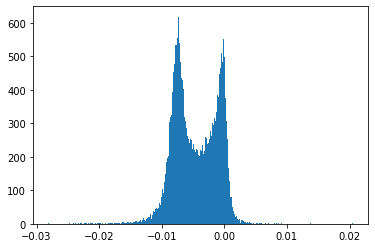

In [130]:
plt.hist(y_preds['train'], bins=1000)

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        4.000e+00, 9.000e+00, 3.000e+00, 8.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

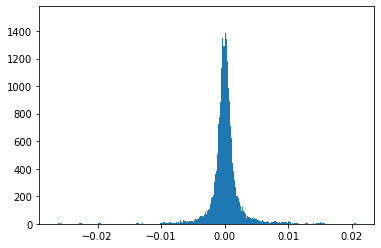

In [131]:
plt.hist(y_true, bins=1000)

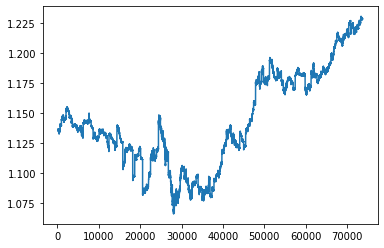

In [132]:
plt.plot(train['close_1min'])

In [43]:
def get_profit(data, y_preds, times_spread=0):
    preds = y_preds[:,0].flatten()[:-time_limit]
    direction = np.sign(preds)
    b = data.shape[0] - preds.shape[0]
    close1 = data['close_1min'].values[:-b]
    close2 = data['close_1min'].values[time_limit:-b+time_limit]
    diff = close2 - close1
    spread = data['spread'].values[:-b]
    profit = 100 * (margin_size*direction * (diff - (spread*direction))) /  close1
#     profit = [p for p, pred, s, c in zip(profit, preds, spread, close1) if abs(pred) > 100*margin_size*times_spread*s/c]
    return profit

In [28]:
profits = {'train': get_profit(df[0], y_preds['train'], 0), 'test': get_profit(df[1], y_preds['test'], 0)}

In [96]:
# time_limit = 120
def get_profit(data, y_preds, times_spread=0):
    preds = y_preds[:,0].flatten()[:-time_limit]
    direction = np.sign(preds)
    b = data.shape[0] - preds.shape[0]
    close1 = data['close_1min'].values[:-b]
    close2 = data['close_1min'].values[time_limit:-b+time_limit]
    diff = close2 - close1
    spread = data['spread'].values[:-b]
    profit = 100 * (margin_size*direction * (diff - (spread*direction))) /  close1
    print(abs(preds).mean())
    print((40*spread/close1).mean())
    profit = [p for p, pred, s, c in zip(profit, preds, spread, close1) if abs(pred) > 40*s/c]
    return profit

In [120]:
def get_profit(data, y_preds, margin_lower_limit=0):
    idx = 0
    profits = 0
    margin = 0
    account_value = [1]
    old_date = data['date'].iloc[idx]
    increase = 1
    start_profit = profits
    while idx < len(y_preds) - 2:
        pred = y_preds[idx][0]
        date = data['date'].iloc[idx]
        direction = np.sign(margin)
        close =  data.iloc[idx]['close_1min']
        spread = data.iloc[idx]['spread']
#         if date != old_date:
#             profits += (margin * (close - (spread*direction)))
#             margin = 0
            
        if abs(pred + margin) < margin_size*account_value[-1]:
            profits += (pred * (close - (spread*direction)))
            margin += pred
            
        account_value.append(1 + (margin * (close - (spread*direction))) - profits)
        idx += 1
        
    idx = -1
    direction = np.sign(margin)
    close =  data.iloc[idx]['close_1min']
    spread = data.iloc[idx]['spread']
    profits += (margin * (close - (spread*direction)))
    margin = 0
    return profits

In [110]:
v = get_profit(df[1], y_preds['test'], 0)

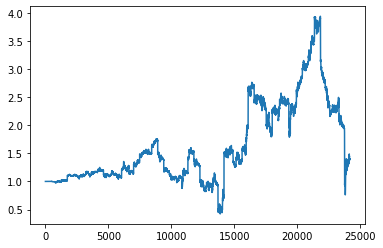

In [111]:
plt.plot(v)

In [121]:
profits_fixed = {'train': get_profit(df[0], y_preds['train'], 0), 'test': get_profit(df[1], y_preds['test'], 0)}

In [123]:
profits_fixed

{'train': -367.35985595924944, 'test': -234.74621837180348}

In [122]:
temp = {'train': train.iloc[:len(profits_fixed['train'])].copy(), 'test': test.iloc[:len(profits_fixed['test'])].copy()}
temp['train']['profit'] = profits_fixed['train']
temp['test']['profit'] = profits_fixed['test']

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
temp['train']['profit'].hist()

In [ ]:
temp['test']['profit'].hist()

In [ ]:
temp['train']['profit'].plot()

In [ ]:
temp['test']['profit'].plot()

In [ ]:
temp['train']['profit'].cumsum().plot()

In [ ]:
temp['test']['profit'].cumsum().plot()

In [ ]:
sum(temp['train']['profit'])

In [ ]:
sum(temp['test']['profit'])

In [ ]:
(252 ** 0.5) * np.mean(temp['train']['profit']) / np.std(temp['train']['profit'])

In [ ]:
(252 ** 0.5) * np.mean(temp['test']['profit']) / np.std(temp['test']['profit'])